# 50. データの入手・整形

In [1]:
import pandas as pd
from random import shuffle

In [2]:
data_list = list()
with open('./data/NewsAggregatorDataset/newsCorpora.csv', mode = 'r') as f:
    for line in f:
        splited_line = line.split('\t')
        if splited_line[3] in ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']:
            data_list.append([splited_line[1], splited_line[4]])

row_size = len(data_list)
shuffle(data_list)

train_size = row_size // 10 * 8
valid_size = row_size // 10
test_size = row_size // 10

path = './work/'
file_names = ['train.txt', 'valid.txt', 'test.txt']
data_names = ['train_data', 'valid_data', 'test_data']

file_data = dict()
train_data = data_list[:train_size]
valid_data = data_list[train_size:train_size + valid_size]
test_data = data_list[-test_size:]

file_data['train_data'] = train_data
file_data['valid_data'] = valid_data 
file_data['test_data'] = test_data

for idx, file_name in enumerate(file_names):
    with open(path + file_name, mode = 'w') as f:
        for data in file_data[data_names[idx]]:
            f.write('\t'.join([data[0], data[1]]) + '\n')

In [3]:
!wc ./work/*.txt

  1335  15310  89062 ./work/test.txt
 10680 122275 713114 ./work/train.txt
  1335  15314  89675 ./work/valid.txt
 13350 152899 891851 total


# 51. 特徴量抽出

0 : ビジネス  
1 : 科学技術  
2 : エンターテイメント  
3 : 健康  

In [4]:
def save_file_npy(dir_name, file_name, x):
    np.save(f'{dir_name}{file_name}', x)
        
def load_file_npy(dir_name, file_name):
    return np.load(f'{dir_name}{file_name}').astype(np.float32)

def chr2num(y):
    converter = dict()
    converter['b'] = 0
    converter['t'] = 1
    converter['e'] = 2
    converter['m'] = 3
    return np.asarray([converter[article_type] for article_type in y])

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np

In [6]:
vectorizer = TfidfVectorizer()
train_tfidf = vectorizer.fit_transform(list(map(lambda x: x[0], train_data)))

In [7]:
print('Vocabulary size: {}'.format(train_tfidf.shape[1]))

Vocabulary size: 12745


In [8]:
pd.DataFrame(train_tfidf.toarray(), columns = vectorizer.get_feature_names())

,00,07,08,09,0ff,0ut,10,100,1000,10000,...,zombie,zombies,zone,zuckerberg,zynga,zâ,œf,œlousyâ,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
valid_tfidf = vectorizer.transform(list(map(lambda x: x[0], valid_data)))
test_tfidf = vectorizer.transform(list(map(lambda x: x[0], test_data)))

In [10]:
save_file_npy('work/', 'train_feature', train_tfidf.toarray())
save_file_npy('work/', 'valid_feature', valid_tfidf.toarray())
save_file_npy('work/', 'test_feature', test_tfidf.toarray())

In [11]:
train_y = chr2num(list(map(lambda x: x[1], train_data)))
valid_y = chr2num(list(map(lambda x: x[1], valid_data)))
test_y = chr2num(list(map(lambda x: x[1], test_data)))

In [12]:
save_file_npy('work/', 'train_y', train_y)
save_file_npy('work/', 'valid_y', valid_y)
save_file_npy('work/', 'test_y', test_y)

# 52. 学習

In [ ]:
train_x = load_file_npy('work/', 'train_feature.npy')
train_y = load_file_npy('work/', 'train_y.npy')
valid_x = load_file_npy('work/', 'valid_feature.npy')
valid_y = load_file_npy('work/', 'valid_y.npy')
test_x = load_file_npy('work/', 'test_feature.npy')
test_y = load_file_npy('work/', 'test_y.npy')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(train_x, train_y)

/Users/y_nakamura/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/y_nakamura/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# 53. 予測

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [17]:
train_pred_y = lr.predict(train_x)
test_pred_y = lr.predict(test_x)

In [18]:
print(test_pred_y)

[0. 0. 0. ... 2. 0. 1.]


# 54. 正解率の計測

In [19]:
print('train accuracy = {}'.format(accuracy_score(y_true = train_y, y_pred = train_pred_y)))
print('test accuracy = {}'.format(accuracy_score(y_true = test_y, y_pred = test_pred_y)))

train accuracy = 0.9191947565543072
test accuracy = 0.8719101123595505


# 55. 混同行列の作成

In [20]:
print('train confusion matrix = \n', confusion_matrix(y_true = train_y, y_pred = train_pred_y))

train confusion matrix = 
 [[4372   34   99    4]
 [ 214  836  178    3]
 [  33    4 4176    0]
 [ 113    3  178  433]]


In [21]:
print('test confusion matrix = \n', confusion_matrix(y_true = test_y, y_pred = test_pred_y))

test confusion matrix = 
 [[531   5  24   1]
 [ 47  65  37   0]
 [  5   0 527   0]
 [ 25   2  25  41]]


# 56. 適合率，再現率，F1スコアの計測

In [22]:
precision_micro = precision_score(y_true = test_y, y_pred = test_pred_y, average = 'micro')
print('precision micro = ', precision_micro)
precision_macro = precision_score(y_true = test_y, y_pred = test_pred_y, average = 'macro')
print('precision macro = ', precision_macro)
recall_micro = recall_score(y_true = test_y, y_pred = test_pred_y, average = 'micro')
print('recall micro = ', recall_micro)
recall_macro = recall_score(y_true = test_y, y_pred = test_pred_y, average = 'macro')
print('recall macro = ', recall_macro)
f1_score_micro = f1_score(y_true = test_y, y_pred = test_pred_y, average = 'micro')
print('f1 score micro = ', f1_score_micro)
f1_score_macro = f1_score(y_true = test_y, y_pred = test_pred_y, average = 'macro')
print('f1 score macro = ', f1_score_macro)

precision micro =  0.8719101123595505
precision macro =  0.9030074698198732
recall micro =  0.8719101123595505
recall macro =  0.703556848430635
f1 score micro =  0.8719101123595505
f1 score macro =  0.7561588739311382


# 57. 特徴量の重みの確認

In [23]:
print(lr.coef_)

[[ 0.23370706  0.09152903  0.02781592 ... -0.07582384 -0.11456071
  -0.02055301]
 [-0.03529006 -0.01716709 -0.01492154 ... -0.02846105 -0.01749707
  -0.02531176]
 [-0.15552132 -0.06643243 -0.02240759 ...  0.13465343  0.13850095
   0.0417856 ]
 [-0.02862168 -0.01546777 -0.01043294 ... -0.02467371 -0.01192503
  -0.01562117]]


In [24]:
feature_names = np.array(vectorizer.get_feature_names())
print(feature_names[:10])

['00' '07' '08' '09' '0ff' '0ut' '10' '100' '1000' '10000']


In [25]:
#各カテゴリの重み最大の単語
max_indices = np.argpartition(-lr.coef_, 10)[:,:10]
print(feature_names[max_indices])

[['fed' 'bank' 'euro' 'ecb' 'stocks' 'oil' 'ukraine' 'china' 'update'
  'profit']
 ['gm' 'tesla' 'climate' 'apple' 'microsoft' 'facebook' 'google' 'nasa'
  'fcc' 'mobile']
 ['she' 'chris' 'cyrus' 'miley' 'kim' 'star' 'kardashian' 'her' 'paul'
  'film']
 ['cancer' 'fda' 'drug' 'outbreak' 'study' 'ebola' 'could' 'cases'
  'health' 'mers']]


In [26]:
#各カテゴリの重み最小の単語
min_indices = np.argpartition(lr.coef_, 10)[:,:10]
print(feature_names[min_indices])

[['her' 'apple' 'the' 'google' 'and' 'kardashian' 'she' 'star' 'chris'
  'ebola']
 ['shares' 'euro' 'ukraine' 'kim' 'stocks' 'fed' 'ecb' 'kardashian' 'her'
  'bank']
 ['china' 'apple' 'says' 'ceo' 'us' 'google' 'update' 'bank' 'study'
  'facebook']
 ['china' 'kardashian' 'stocks' 'fed' 'bank' 'google' 'euro' 'ecb' 'kim'
  'at']]


# 58. 正則化パラメータの変更

In [27]:
C = [10 ** i for i in range(-3, 4)]

In [33]:
train_score = []
valid_score = []
test_score = []
for c in C:
    lr = LogisticRegression(solver='lbfgs', C=c, multi_class='auto', max_iter=10000)
    lr.fit(train_x, train_y)
    train_pred_y = lr.predict(train_x)
    valid_pred_y = lr.predict(valid_x)
    test_pred_y = lr.predict(test_x)
    train_score.append(accuracy_score(y_true=train_y, y_pred=train_pred_y))
    valid_score.append(accuracy_score(y_true=valid_y, y_pred=valid_pred_y))
    test_score.append(accuracy_score(y_true=test_y, y_pred=test_pred_y))

In [31]:
import matplotlib.pyplot as plt

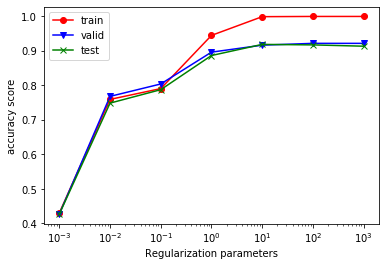

In [36]:
plt.plot(C, train_score, marker="o", color="red", label="train")
plt.plot(C, valid_score, marker="v", color="blue", label="valid")
plt.plot(C, test_score, marker="x", color="green", label="test")
plt.xlabel("Regularization parameters")
plt.ylabel("accuracy score")
plt.xscale("log")
plt.legend()
plt.show()

# 59. ハイパーパラメータの探索

In [37]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameter = {'C':C, 'solver':['lbfgs', 'sag', 'saga', 'newton-cg']}
gridsearch = GridSearchCV(LogisticRegression(multi_class='auto', max_iter=10000), parameter)

In [ ]:
gridsearch.fit(train_x, train_y)

/Users/y_nakamura/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/y_nakamura/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/y_nakamura/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/Users/y_nakamura/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/y_nakamura/.pyenv/versions

In [ ]:
gridsearch.best_params_

In [ ]:
gridsearch.score(test_x, test_y)

In [ ]:
best_score = 0
best_model = None 
for solver in ['lbfgs', 'sag', 'saga', 'newton-cg']:
    for c in C:
        lr = LogisticRegression(solver=solver, C=c, multi_class='auto', max_iter=100)
        lr.fit(train_x, train_y)
        valid_pred_y = lr.predict(valid_x)
        acc = accuracy_score(y_true=valid_y, y_pred=valid_pred_y)
        if best_score < acc:
            best_score = acc
            best_model = lr

In [ ]:
test_pred_y = best_model.predict(test_x)
print(accuracy_score(y_true=test_y, y_pred=test_pred_y))